In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})
    df[col] = df[col].fillna(0)

df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
df['furnishingstatus'] = df['furnishingstatus'].fillna(0)

In [22]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

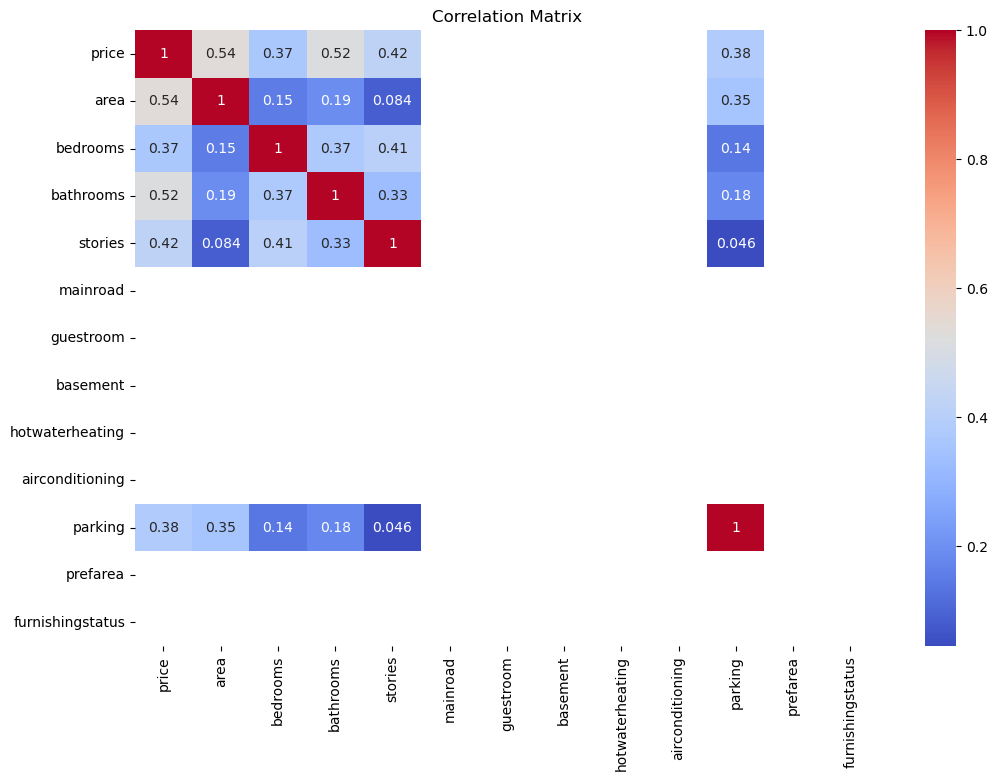

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [24]:
X = df.drop('price', axis=1)
y = df['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R² Score: 0.5464062355495873
Mean Squared Error: 2292721545725.3613
Mean Absolute Error: 1127483.3523235186


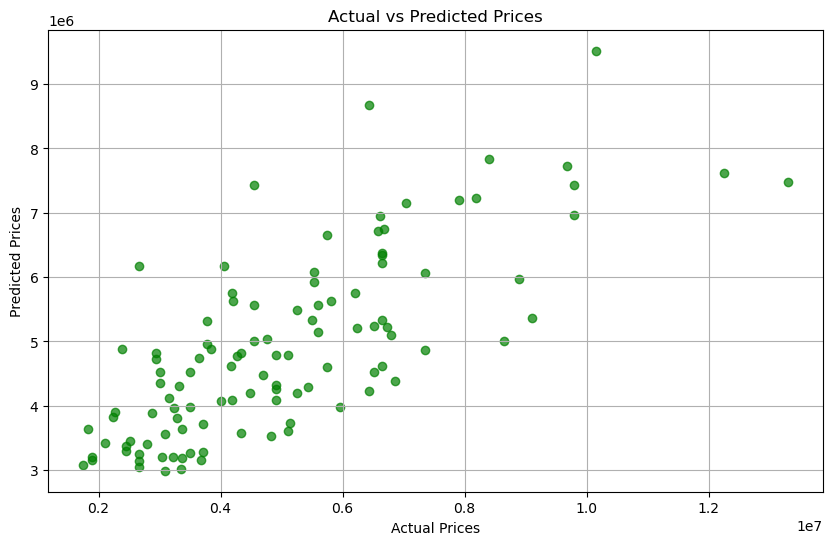

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

In [29]:
# Final Recommendations & Insights
"""
- Area and number of stories show strong positive correlation with house price.
- Features like air conditioning, guestroom, and hot water heating significantly increase property value.
- The model explains approximately 54.6% of the variance in price (R² = 0.546).
- The average absolute error is around 1.12 million, which is reasonable given the scale of real estate prices.
- Model performance can be improved using more advanced algorithms such as Random Forest or Gradient Boosting.
"""

'\n- Area and number of stories show strong positive correlation with house price.\n- Features like air conditioning, guestroom, and hot water heating significantly increase property value.\n- The model explains approximately 54.6% of the variance in price (R² = 0.546).\n- The average absolute error is around 1.12 million, which is reasonable given the scale of real estate prices.\n- Model performance can be improved using more advanced algorithms such as Random Forest or Gradient Boosting.\n'